In [1]:
import os
import sys
import argparse
import torch
from getdist import plots, MCSamples
import getdist
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [2]:
path = os.path.realpath(os.path.join(os.getcwd(), '../..'))
sys.path.insert(0, path)

In [3]:
from nnest import MCMCSampler

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [5]:
# Himmelblau
dims = 2
def loglike(z):
    z1 = z[:, 0]
    z2 = z[:, 1]
    return - (z1**2 + z2 - 11.)**2 - (z1 + z2**2 - 7.)**2

In [6]:
# Rosenbrock
dims = 4
def loglike(z):
    return np.array([-sum(100.0 * (x[1:] - x[:-1] ** 2.0) ** 2.0 + (1 - x[:-1]) ** 2.0) for x in z])

In [7]:
# Gauss
#corr = 0.99
#dims = 2
#def loglike(x):
#    return multivariate_normal.logpdf(x, mean=np.zeros(dims), cov=np.eye(dims) + corr * (1 - np.eye(dims)))

In [8]:
sampler = MCMCSampler(dims, loglike, hidden_dim=64, num_layers=1, num_blocks=5, scale='constant')

Creating directory for new run logs/test/run35
[nnest.trainer] [INFO] SingleSpeed(
  (net): FlowSequential(
    (0): CouplingLayer(
      (translate_net): Sequential(
        (0): Linear(in_features=4, out_features=64, bias=True)
        (1): ReLU()
        (2): Linear(in_features=64, out_features=64, bias=True)
        (3): ReLU()
        (4): Linear(in_features=64, out_features=4, bias=True)
      )
    )
    (1): ScaleLayer()
    (2): CouplingLayer(
      (translate_net): Sequential(
        (0): Linear(in_features=4, out_features=64, bias=True)
        (1): ReLU()
        (2): Linear(in_features=64, out_features=64, bias=True)
        (3): ReLU()
        (4): Linear(in_features=64, out_features=4, bias=True)
      )
    )
    (3): ScaleLayer()
    (4): CouplingLayer(
      (translate_net): Sequential(
        (0): Linear(in_features=4, out_features=64, bias=True)
        (1): ReLU()
        (2): Linear(in_features=64, out_features=64, bias=True)
        (3): ReLU()
        (4): Lin

In [9]:
sampler.run(bootstrap_iters=2, jitter=0.01)

[nnest.sampler] [INFO] Alpha [0.5000]
[nnest.sampler] [INFO] Bootstrap step [1]
[nnest.sampler] [INFO] Getting initial samples with emcee
[nnest.sampler] [INFO] Mean acceptance fraction: [0.428]
[nnest.trainer] [INFO] Number of training samples [2000]
[nnest.trainer] [INFO] Training jitter [0.0100]
[nnest.trainer] [INFO] Epoch [1] train loss [0.0590] validation loss [0.0288]
[nnest.trainer] [INFO] Epoch [50] train loss [0.0406] validation loss [0.0204]
[nnest.trainer] [INFO] Epoch [100] train loss [0.0387] validation loss [0.0194]
[nnest.trainer] [INFO] Epoch [150] train loss [0.0383] validation loss [0.0192]
[nnest.trainer] [INFO] Epoch [200] train loss [0.0380] validation loss [0.0191]
[nnest.trainer] [INFO] Best epoch [199] validation loss [0.0190]
[nnest.sampler] [INFO] Bootstrap step [2]
[nnest.sampler] [INFO] Acceptance [0.4000] min ESS [0.7731] max ESS [1.0613] average jump distance [0.5660]
[nnest.sampler] [INFO] Acceptance [0.2537] min ESS [2.2198] max ESS [5.0328] average jum

In [10]:
samples = [sampler.samples[i, :, :].squeeze() for i in range(sampler.samples.shape[0])]
latent_samples = [sampler.latent_samples[i, :, :].squeeze() for i in range(sampler.latent_samples.shape[0])]
loglikes = [sampler.loglikes[i, :].squeeze() for i in range(sampler.loglikes.shape[0])]

In [11]:
mc = MCSamples(samples=samples, loglikes=loglikes)

Removed no burn in


In [12]:
print(mc.getEffectiveSamples())
print(mc.getMargeStats())
print(mc.getConvergeTests())

752.7365770385744
Marginalized limits: 0.68; 0.95; 0.99

parameter   mean           sddev          lower1         upper1         limit1 lower2         upper2         limit2 lower3         upper3         limit3 
param1      7.1784782E-01  4.0221416E-01  6.6182120E-01  1.1061535E+00  two   -2.6550962E-01  1.1868041E+00  two   -7.8887915E-01  1.1968079E+00  two     p_{1}
param2      6.7922351E-01  3.5052937E-01  4.4613334E-01  1.1462804E+00  two    1.1413509E-04  1.2206430E+00  two   -8.2083630E-02  1.2795423E+00  two     p_{2}
param3      5.8582018E-01  4.4052688E-01 -1.3304481E-02  9.0028074E-01  two   -1.0025936E-01  1.3937995E+00  two   -1.6969955E-01  1.5709936E+00  two     p_{3}
param4      5.3457727E-01  6.1471820E-01 -1.1861289E-01  7.1798078E-01  two   -1.7473724E-01  1.9878219E+00  two   -2.1053686E-01  2.3728737E+00  two     p_{4}

Parameter autocorrelation lengths (effective number of samples N_eff = tot weight/weight length)

            Weight Length   Sample length         

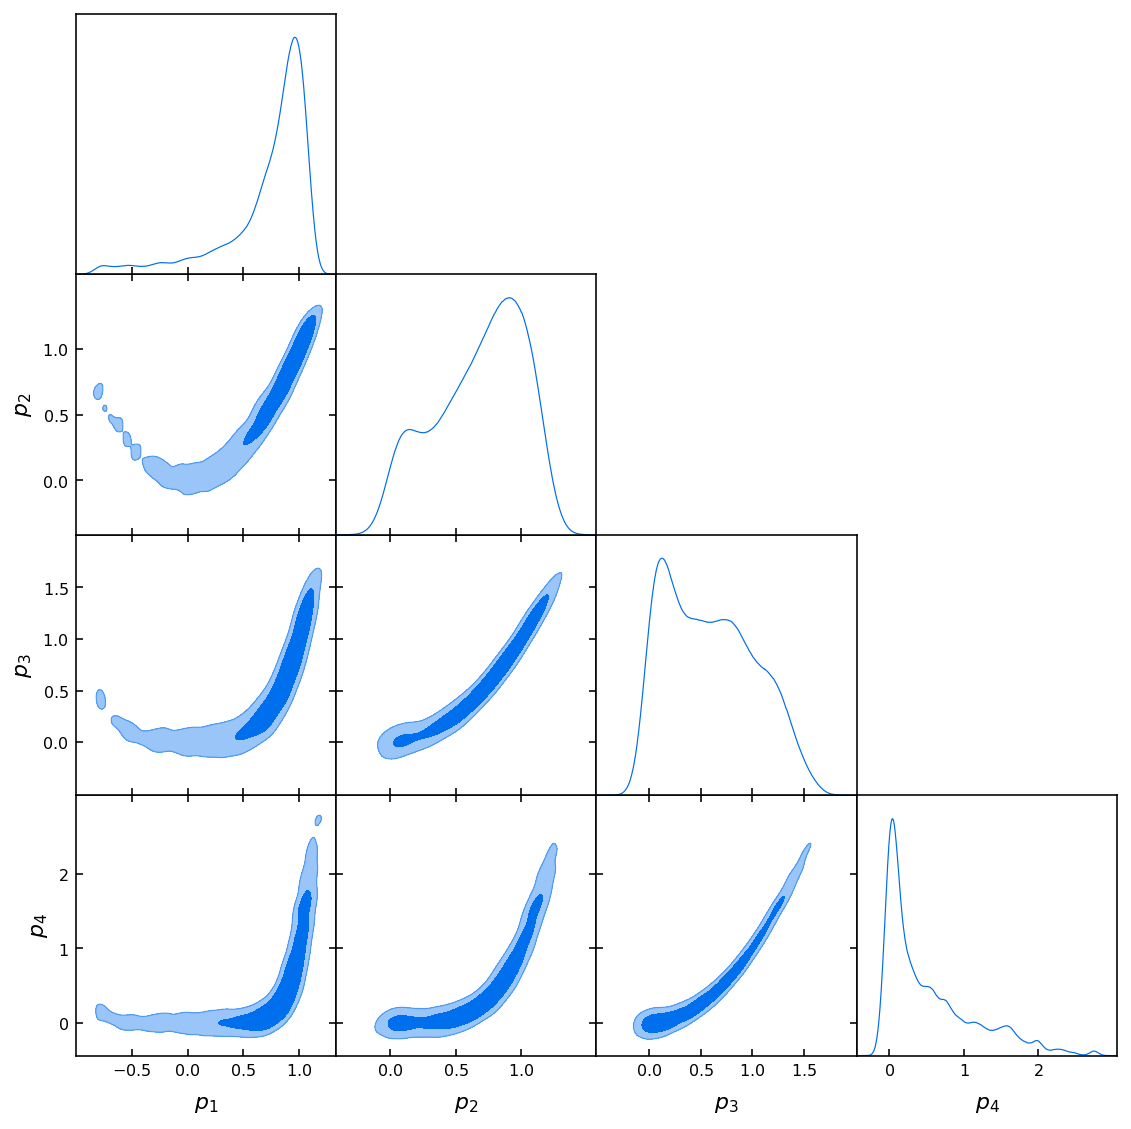

In [13]:
g = plots.getSubplotPlotter(width_inch=8)
g.triangle_plot(mc, filled=True)

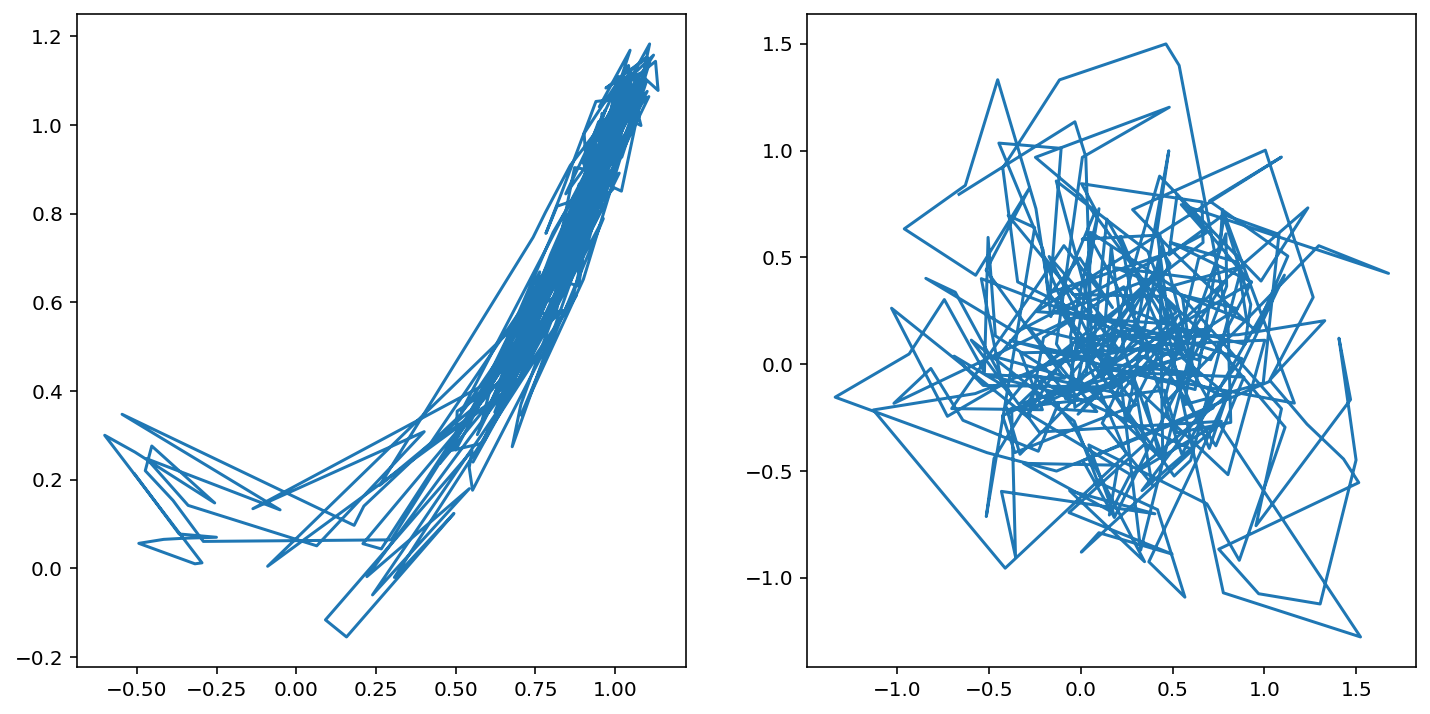

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].plot(samples[0][0:1000,0], samples[0][0:1000,1])
ax[1].plot(latent_samples[0][0:1000,0], latent_samples[0][0:1000,1])
plt.show()